# Introduction

## Penjelasan Data


Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan "yes" (ya) atau "no" (tidak) berlangganan.

# Install and Import Required Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

## Data Loading

## Dataset

In [87]:
bank_df = pd.read_csv('./dataset/Assignment_3/bank-additional-full.csv', sep=';')
test_bank_df = pd.read_csv('./dataset/Assignment_3/bank-additional.csv', sep=';')

In [88]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Dataset Additional Descriptions

## Mengetahui dimensi dataset

In [89]:
print('Dimensi data = ', bank_df.shape)

Dimensi data =  (41188, 21)


In [90]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Pengelompokkan attribut berdasarkan tipe data

In [91]:
numerical_columns = list(bank_df.select_dtypes(include=['int64']).columns.values) + list(bank_df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(bank_df.select_dtypes(include=['object']))

In [92]:
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [93]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

## Deskriptif Statistik untuk numerical_columns

In [94]:
bank_df[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Mengetahui jumlah data masing-masing kelas


In [95]:
bank_df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


# Data Cleaning

In [96]:
# Mengetahui jumlah "unknown" pada atribut
bank_df[
    bank_df[categorical_columns] == 'unknown'
].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

## Mengganti "unknown" dengan Numpy nan

In [97]:
# Mengganti "unknown" pada data latih
bank_df[
    bank_df[categorical_columns] == "unknown"
] = np.nan

In [98]:
# Mengetahui jumlah "unknown" pada atribut
bank_df[
    bank_df[categorical_columns] == 'unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [99]:
#check unstandard missing value categorical_columns
bank_df[
    categorical_columns
].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [100]:
#check unstandard missing value numerical_columns
bank_df[
    numerical_columns
].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [101]:
# mengganti nilai 999 pada pdays 
bank_df['pdays'].replace(999,0,inplace=True)

In [102]:
print("Jumlah nan missing values categorical_columns = ", bank_df[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values numerical_columns = ", bank_df[numerical_columns].isnull().sum().sum())

Jumlah nan missing values categorical_columns =  12718
Jumlah nan missing values numerical_columns =  0


# Penanganan Missing Values

## Pemisahan bertipe kategorical dan numerical

In [103]:
# categorical data
bank_df_categorical = bank_df[categorical_columns]

# numerical data
bank_df_numerical = bank_df[numerical_columns]

## Mengisi missing value

In [104]:
# instansiasi kelas SimpleImputer untuk imputer kategorical_columns
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [105]:
# fit dengan data training
imputer_categorical.fit(bank_df_categorical)

SimpleImputer(strategy='most_frequent')

In [106]:
# transform ke data latih
bank_df_categorical = imputer_categorical.transform(bank_df_categorical)

In [107]:
# buat hasil array ke dalam dataframe
bank_df_categorical = pd.DataFrame(bank_df_categorical,columns=categorical_columns)

In [108]:
# concate categorical columns dengan numerical columns
bank_df = pd.concat([bank_df_numerical,bank_df_categorical],axis=1)

## Check missing values

In [109]:
# missing values pada data train
print("Jumlah nan missing values categorical_columns = ",bank_df[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values numerical_columns = ",bank_df[numerical_columns].isnull().sum().sum())

Jumlah nan missing values categorical_columns =  0
Jumlah nan missing values numerical_columns =  0


# Visualisasi Data

In [110]:
bank_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

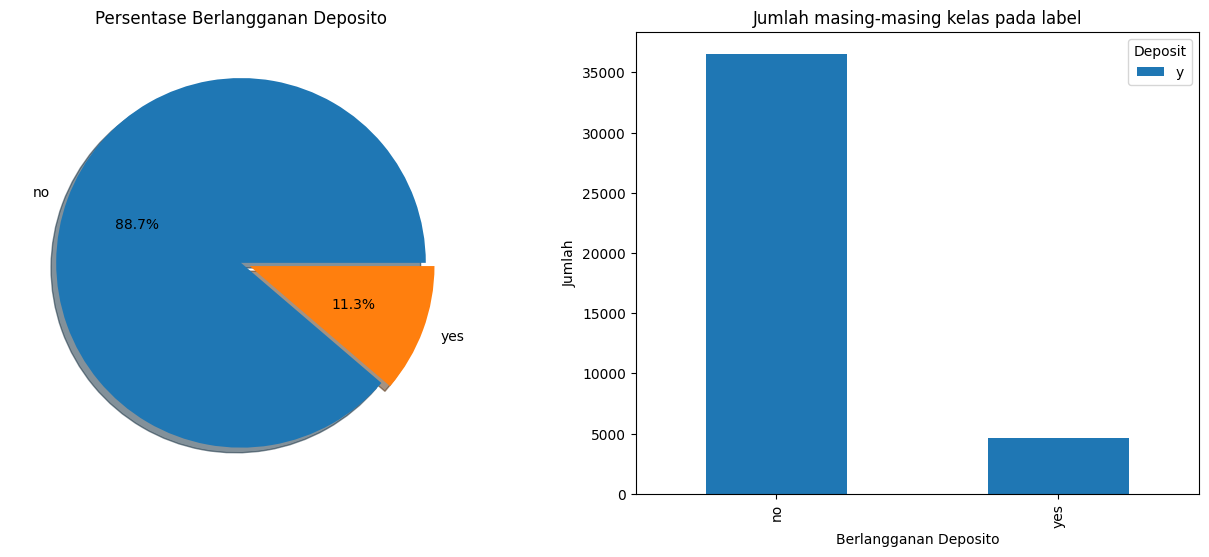

In [111]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "y"
bank_df['y'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Berlangganan Deposito')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
bank_df.groupby('y').agg({'y':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas pada label')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Berlangganan Deposito')
ax[1].legend(title='Deposit')

Terlihat bahwa dari data yang diperoleh, ada ketidakseimbangan proporsi dari setiap nilai pada label kelas. Nilai yes bahkan 7x lebih sedikit dibandingkan nilai no.

## Kecenderungan berlangganan dari status pernikahan

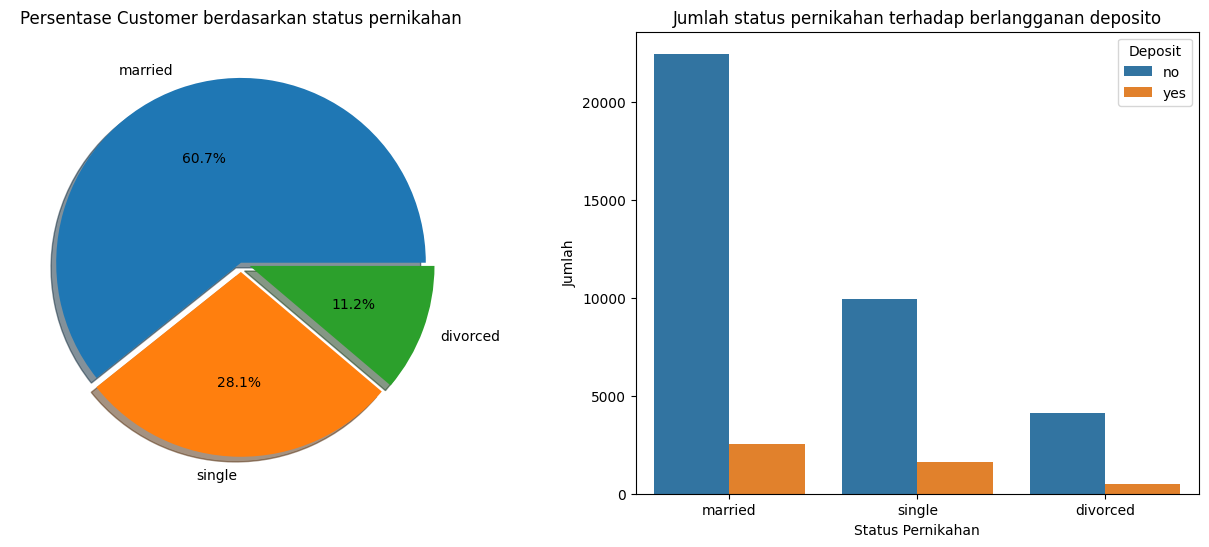

In [112]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "marital"
bank_df['marital'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05,0.05],     
    shadow=True,
)
ax[0].set_title('Persentase Customer berdasarkan status pernikahan')
ax[0].set_ylabel('')

# Barchart besaran setiap status pernikahan terhadap setiap kelas target
sns.countplot(
    x='marital',
    hue='y',
    data=bank_df
)
ax[1].set_title('Jumlah status pernikahan terhadap berlangganan deposito')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Status Pernikahan')
ax[1].legend(title='Deposit')

Data didominasi oleh status pernikahan "married". Status pernikahan ini memberikan jumlah berlangganan deposit untuk kelas 'No' dan 'Yes' tertinggi dibanding 2 status pernikahan lainnya.

In [113]:
bank_df['y'].replace({'yes':1, 'no':0}, inplace=True)

In [114]:
corr = bank_df.corr()
print(corr['y'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
pdays             0.267088
duration          0.405274
y                 1.000000
Name: y, dtype: float64


<ipython-input-114-4e7b5ec231c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_df.corr()


## Drop column yang tidak diperlukan

In [115]:
bank_df.drop(columns=['campaign','previous','nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','day_of_week','cons.conf.idx','contact','month'],axis=0, inplace=True)

In [116]:
bank_df.head()

,age,duration,job,marital,education,default,housing,loan,poutcome,y
0,56,261,housemaid,married,basic.4y,no,no,no,nonexistent,0
1,57,149,services,married,high.school,no,no,no,nonexistent,0
2,37,226,services,married,high.school,no,yes,no,nonexistent,0
3,40,151,admin.,married,basic.6y,no,no,no,nonexistent,0
4,56,307,services,married,high.school,no,no,yes,nonexistent,0


# Encoder

In [117]:
encoder = LabelEncoder()
col = ['marital','default','housing','loan']

for i in col:
    bank_df[i] = encoder.fit_transform(bank_df[i])

In [118]:
# Encoding
cat_features = ['job','marital','education','default','housing','loan','poutcome']
bank_df = pd.get_dummies(bank_df, columns=cat_features, drop_first=True)
bank_df

,age,duration,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_1,housing_1,loan_1,poutcome_nonexistent,poutcome_success
0,56,261,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,37,226,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,40,151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
41184,46,383,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
41185,56,189,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
41186,44,442,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [119]:
#Assign variable features dan label
X = bank_df.drop(columns='y', axis=1).values
y = bank_df['y'].values

In [120]:
#splitting data scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [121]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Logistik Regression

In [122]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
ypred = model_lr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
print(metrics.classification_report(y_test, ypred))

Accuracy:  0.9066116371287529
[[10730   239]
 [  915   473]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.66      0.34      0.45      1388

    accuracy                           0.91     12357
   macro avg       0.79      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



In [123]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Acc:  0.9015942380836772
[[10779   190]
 [ 1026   362]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.66      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



In [124]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [125]:
X_train_smote, y_train_smote= smote.fit_resample(X_train.astype('float'),y_train)


In [126]:
from collections import Counter
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_smote))

Before oversampling:  Counter({0: 25579, 1: 3252})
After oversampling:  Counter({0: 25579, 1: 25579})


In [127]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_smote, y_train_smote)
ypred_smote = model_lr2.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
print(metrics.classification_report(y_test, ypred_smote))

Accuracy:  0.8360443473334952
[[9278 1691]
 [ 335 1053]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.38      0.76      0.51      1388

    accuracy                           0.84     12357
   macro avg       0.67      0.80      0.71     12357
weighted avg       0.90      0.84      0.86     12357



In [128]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_smote, y_train_smote)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Acc:  0.8178360443473335
[[9022 1947]
 [ 304 1084]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     10969
           1       0.36      0.78      0.49      1388

    accuracy                           0.82     12357
   macro avg       0.66      0.80      0.69     12357
weighted avg       0.90      0.82      0.84     12357



# K-NEAREST NEIGHBOR ALGORITHM

In [129]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_smote, y_train_smote)
pred_cv5= KNN.predict(X_test)
print("ACC: ", metrics.accuracy_score(y_test, pred_cv5))
matrix5 = metrics.confusion_matrix(y_test, pred_cv5)
print(matrix5)
print(metrics.classification_report(y_test, pred_cv5))

ACC:  0.8084486525855791
[[9089 1880]
 [ 487  901]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     10969
           1       0.32      0.65      0.43      1388

    accuracy                           0.81     12357
   macro avg       0.64      0.74      0.66     12357
weighted avg       0.88      0.81      0.83     12357



In [130]:
print("Accuracy menggunakan algoritma Logistik Regression pada imbalanced dataset : ",
      metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
recall1 = (10731)/(10731+238)
precision1= 10731/(10731+903)
print("precision : ", precision1)
print("recall: ",recall1)
print(metrics.classification_report(y_test, ypred))
print("Accuracy menggunakan algoritma Logistik Regression setelah melakukan balancing dataset: ",
     metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
recall2= 9282/(9282+1687)
precision2 = 9282/(9282+308)
print("precision: ",precision2)
print("recall: ", recall2)
print(metrics.classification_report(y_test, ypred_smote))

Accuracy menggunakan algoritma Logistik Regression pada imbalanced dataset :  0.9066116371287529
[[10730   239]
 [  915   473]]
precision :  0.9223826714801444
recall:  0.9783024888321634
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.66      0.34      0.45      1388

    accuracy                           0.91     12357
   macro avg       0.79      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357

Accuracy menggunakan algoritma Logistik Regression setelah melakukan balancing dataset:  0.8360443473334952
[[9278 1691]
 [ 335 1053]]
precision:  0.9678832116788321
recall:  0.8462029355456286
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.38      0.76      0.51      1388

    accuracy                           0.84     12357
   macro avg       0.67      0.80      0.71     12357
weighted avg       

Untuk proses klasifikasi menggunakan algoritma Logistic Regression dengan performa yang dihasilkan lebih baik dari yang algoritma yang lain seperti SVM dan KNN serta waktu yang dibutuhkan untuk runtime lebih cepat. Hasil classification diatas dapat dilihat bahwa proses klasifikasi dengan dataset imbalanced menghasilkan accuracy sebesar **0.91**. Serta hasil klasifikasi setelah dilakukan balancing dataset menggunakan metode oversampling SMOTE menghasilkan accuracy sebesar **0.84**. walaupun memiliki tingkat accuracy, precision, dan recall yang tinggi penggunaan dataset imbalanced akan berisiko.

In [131]:
import pickle
pickle.dump(model_lr2, open('./model_classifier.pkl','wb'))